In [1]:
# library
import numpy as np
import pandas as pd

import plotly as py
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_clean.csv')
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# EDA-Exploratory Data Analysis

In [3]:
churn = df["Attrition_Flag"].value_counts()
churn

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

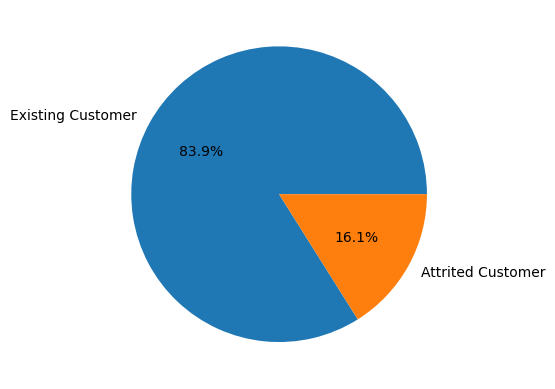

In [5]:
plt.pie(x=churn, labels=churn.keys(),autopct="%.1f%%")
plt.show()

Data imbalance exists

## 1. Numerical Fields

In [6]:
# related fields
df_frequency = pd.concat([df['Customer_Age'],
                    df['Total_Trans_Ct'],
                    df['Total_Trans_Amt'],
                    df['Months_Inactive_12_mon'],
                    df['Credit_Limit'],
                    df['Attrition_Flag']],axis=1)
df_frequency.head()

,Customer_Age,Total_Trans_Ct,Total_Trans_Amt,Months_Inactive_12_mon,Credit_Limit,Attrition_Flag
0,45,42,1144,1,12691.0,Existing Customer
1,49,33,1291,1,8256.0,Existing Customer
2,51,20,1887,1,3418.0,Existing Customer
3,40,20,1171,4,3313.0,Existing Customer
4,40,28,816,1,4716.0,Existing Customer


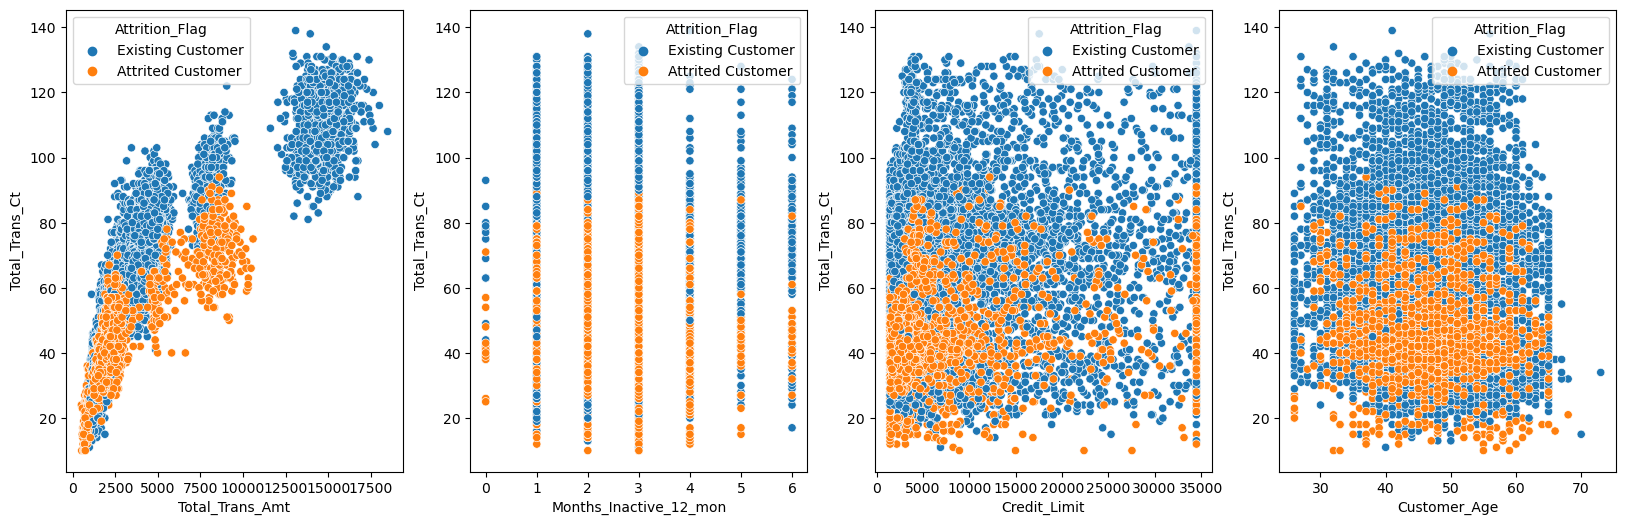

In [7]:
# define canvas size

# use plt and sns

fig, ax = plt.subplots(ncols=4, figsize=(20,6))

sns.scatterplot(data=df_frequency,
                x="Total_Trans_Amt",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[0])

sns.scatterplot(data=df_frequency,
                x="Months_Inactive_12_mon",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[1])

sns.scatterplot(data=df_frequency,
                x="Credit_Limit",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[2])

sns.scatterplot(data=df_frequency,
              x="Customer_Age",
              y="Total_Trans_Ct",
              hue="Attrition_Flag",
              ax=ax[3])

plt.show()

Raw Conclusions: 
Customers are more likely to exist, when they:
* spend more
* are not inactive between 2-3 months
* have higher credit limit
* no matter what age (irrelevant to age)

In [ ]:
# backup code:
# use plotly_express
for col in ["Customer_Age","Total_Trans_Amt","Months_Inactive_12_mon","Credit_Limit"]:
    fig = px.scatter(df_frequency,
                     x=col,
                     y="Total_Trans_Ct",
                     color="Attrition_Flag")
    fig.show()

## 2. Customer Profile

In [8]:
# related fields
df_demographic=df[['Customer_Age',
                   'Gender',
                   'Education_Level',
                   'Marital_Status',
                   'Income_Category',
                   'Attrition_Flag']]

df_demographic.head()

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Attrition_Flag
0,45,M,High School,Married,$60K - $80K,Existing Customer
1,49,F,Graduate,Single,Less than $40K,Existing Customer
2,51,M,Graduate,Married,$80K - $120K,Existing Customer
3,40,F,High School,Unknown,Less than $40K,Existing Customer
4,40,M,Uneducated,Married,$60K - $80K,Existing Customer


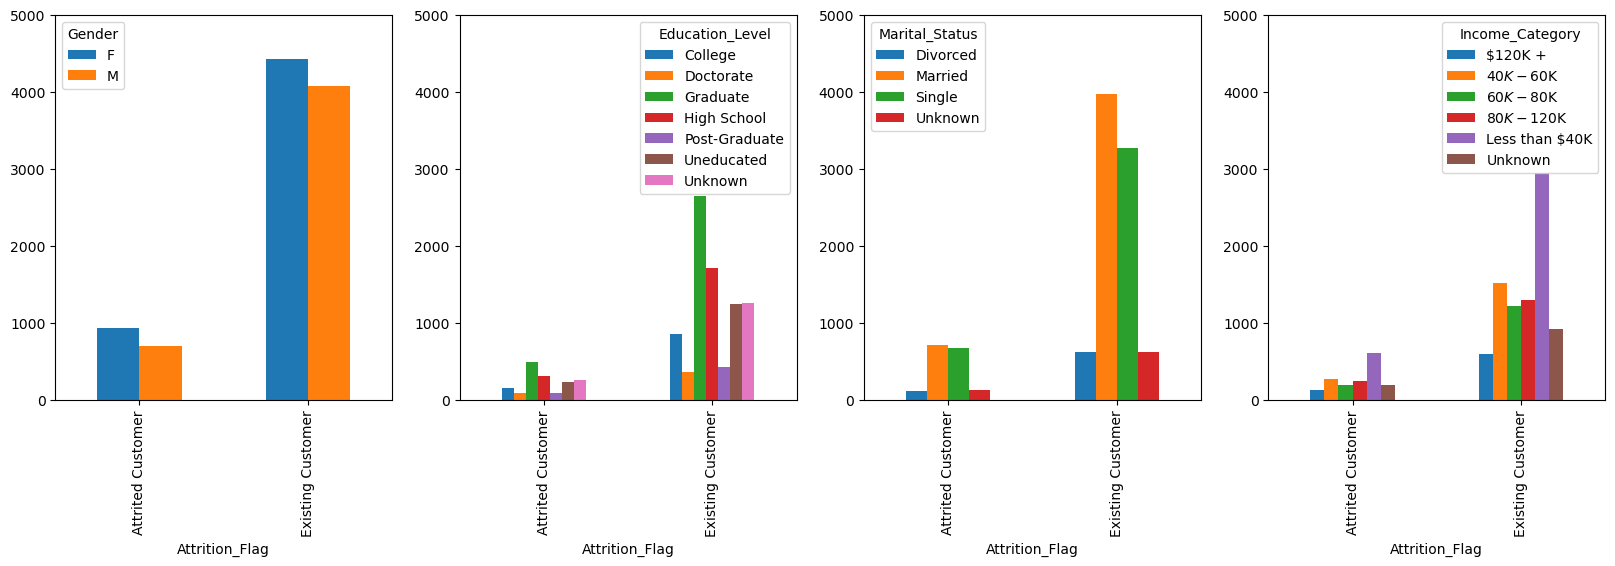

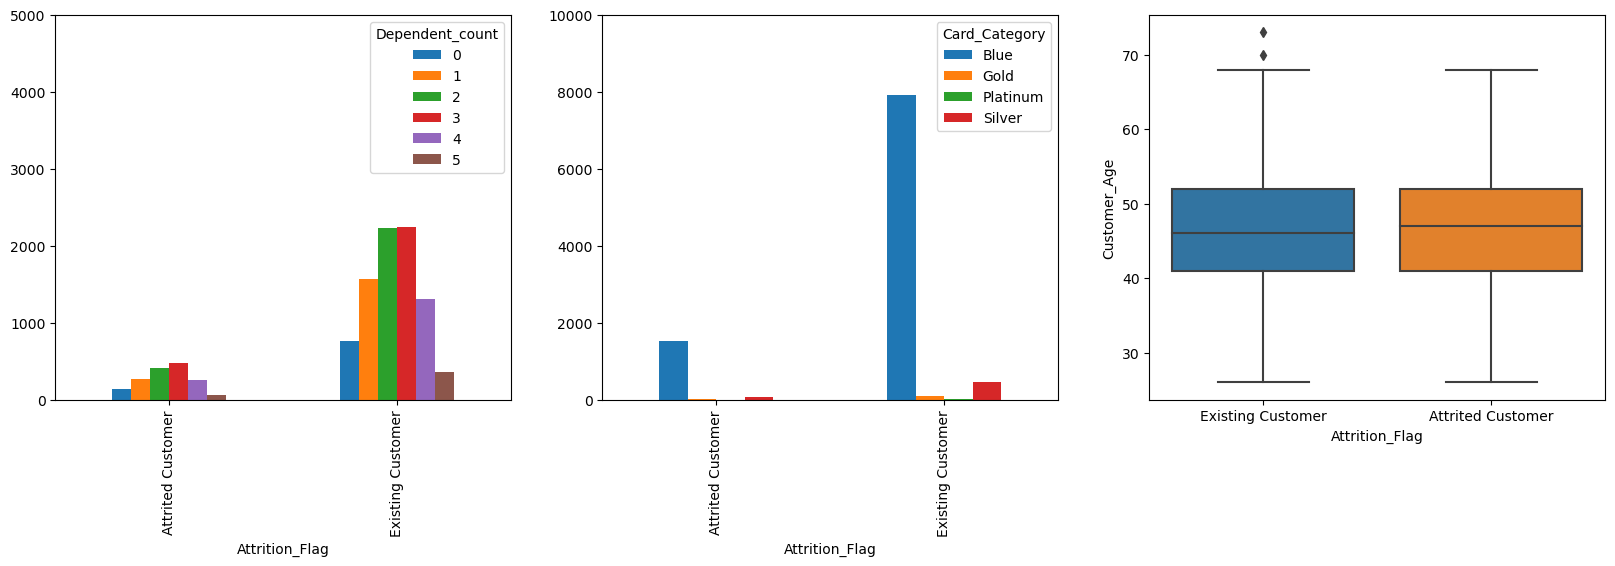

In [13]:
# Cross-table Analysis
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(20,5))

pd.crosstab(df["Attrition_Flag"],df["Gender"]).plot(kind="bar", ax=ax1, ylim=[0,5000])
pd.crosstab(df["Attrition_Flag"],df["Education_Level"]).plot(kind="bar", ax=ax2, ylim=[0,5000])
pd.crosstab(df["Attrition_Flag"],df["Marital_Status"]).plot(kind="bar", ax=ax3, ylim=[0,5000])
pd.crosstab(df["Attrition_Flag"],df["Income_Category"]).plot(kind="bar", ax=ax4, ylim=[0,5000])

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Dependent_count']).plot(kind='bar',ax=ax1, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])

_box = sns.boxplot(data=df_demographic,x='Attrition_Flag',y='Customer_Age', ax=ax3)

plt.show()

## 3. Relevence
* Categorical: Cramer's V
* Numerical: Pearson Correlation

In [16]:
df_categorical=df.loc[:,df.dtypes==object] # df.select_dtypes(include="O")
df_categorical.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [17]:
# type encoding on categorical type data
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame()

for i in df_categorical.columns:
    df_categorical_encoded[i] = label.fit_transform(df_categorical[i])

df_categorical_encoded.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,1,3,1,2,0
1,1,0,2,2,4,0
2,1,1,2,1,3,0
3,1,0,3,3,4,0
4,1,1,5,1,2,0


In [18]:
# Cramers_V

from scipy.stats import chi2_contingency

def cal_cramers_v(v1,v2):
    crosstab = np.array(pd.crosstab(v1,v2,rownames=None,colnames=None))
    stat = chi2_contingency(crosstab)[0]

    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1

    return stat / (obs * mini)

rows = []
for v1 in df_categorical_encoded:
    col = []
    for v2 in df_categorical_encoded:
        cramers = cal_cramers_v(df_categorical_encoded[v1],df_categorical_encoded[v2])
        col.append(round(cramers, 2))
    rows.append(col)

In [19]:
# heat map

cramers_results = np.array(rows)

cramerv_matrix = pd.DataFrame(cramers_results,
                              columns=df_categorical_encoded.columns,
                              index=df_categorical_encoded.columns)
cramerv_matrix.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
Attrition_Flag,1.0,0.0,0.0,0.0,0.0,0.00
Gender,0.0,1.0,0.0,0.0,0.7,0.01
Education_Level,0.0,0.0,1.0,0.0,0.0,0.00
Marital_Status,0.0,0.0,0.0,1.0,0.0,0.00
Income_Category,0.0,0.7,0.0,0.0,1.0,0.00


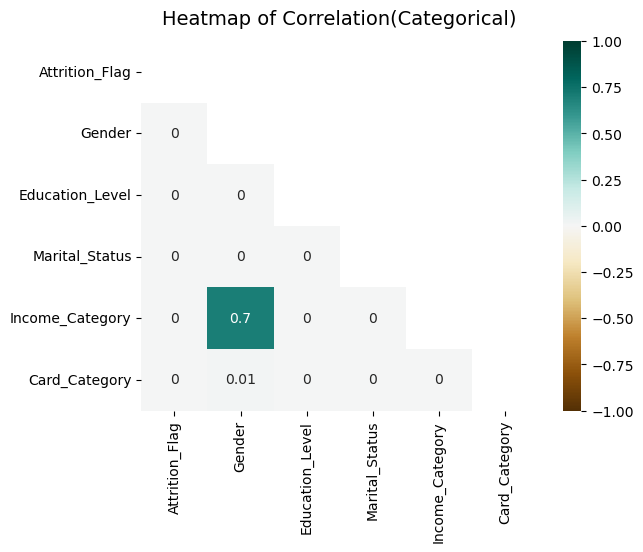

In [20]:
mask = np.triu(np.ones_like(cramerv_matrix, dtype=bool))
cat_heatmap = sns.heatmap(cramerv_matrix,
                          mask=mask,
                          vmin=-1,
                          vmax=1,
                          annot=True,
                          cmap="BrBG")

cat_heatmap.set_title("Heatmap of Correlation(Categorical)", fontdict={"fontsize": 14}, pad=12)

plt.show()

In [21]:
# numeric
df_number = df.select_dtypes(exclude="O")
df_number.head()

,Unnamed: 0,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [22]:
# heat code encoding operation on Attrition_Flag
df_number["Attrition_Flag"] = df.loc[:, "Attrition_Flag"]
df_number.head()

,Unnamed: 0,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Existing Customer
1,1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Existing Customer
2,2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,Existing Customer
3,3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Existing Customer
4,4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Existing Customer


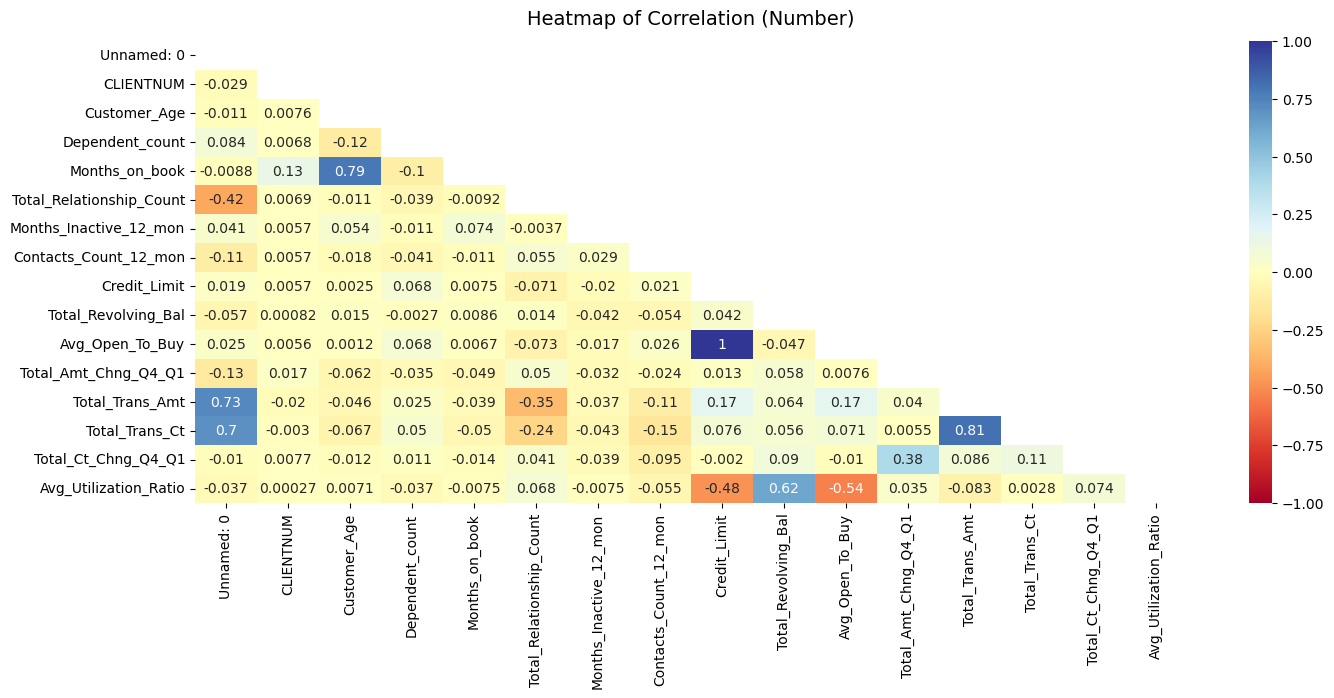

In [23]:
# pearson correlation

from scipy import stats

num_corr = df_number.corr(method='pearson')
plt.figure(figsize = (16,6))

mask = np.triu(np.ones_like(num_corr, dtype=bool))
heatmap_number = sns.heatmap(num_corr, mask=mask,
                             vmin=-1, vmax=1,
                             annot=True, cmap="RdYlBu")

heatmap_number.set_title("Heatmap of Correlation (Number)", fontdict={"fontsize": 14}, pad=12)

plt.show()

Conclusions:

Irrelevant fields: ( $\rho_i$ in [-0.1,0.1] )
* Credit Limit
* Average Open To Buy
* Months On Book
* Age
* Dependent Count